In [18]:
import numpy as np
import pandas as pd
import os
import time
from tqdm import tqdm, trange
import sys
import matplotlib.pyplot as plt


estrategias = ['O', 'Y', 'B'] # estratégias possíveis
index_map = {'O': 0, 'Y': 1, 'B': 2}
n_pop = 100 # número de populações independentes
threshold_max = 0.8 # threshold para a proporção de O na vizinhança adaptativa
estrategias = ['O', 'Y', 'B']
cores = {"O": "#FD9800", "B": "#0047B3", "Y": "#FFF237"}

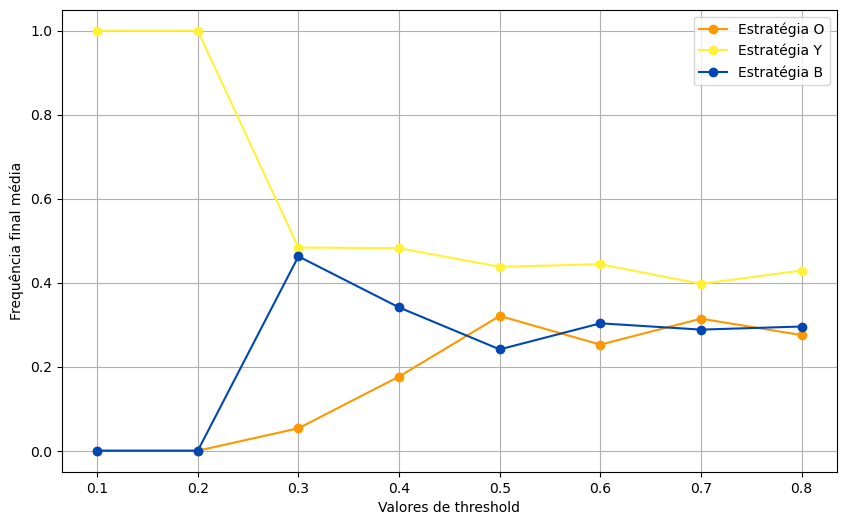

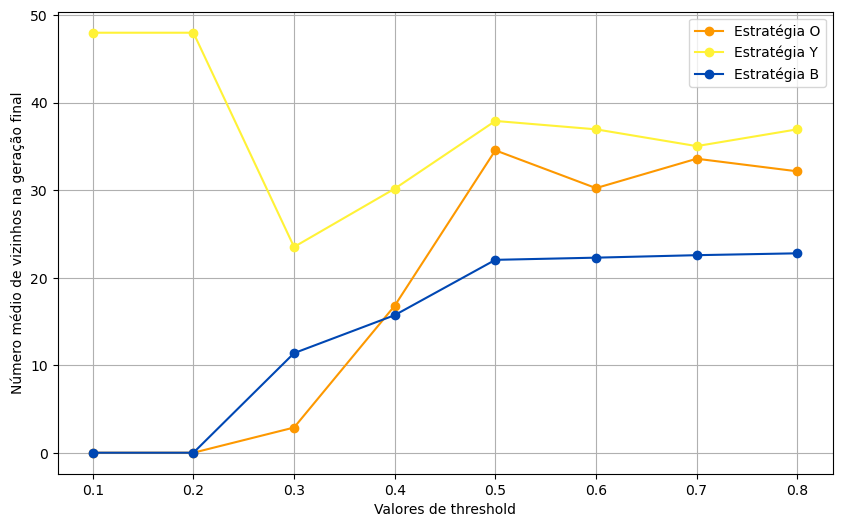

In [25]:
media_freq_final = {estrat: [] for estrat in estrategias}
media_viz = {estrat: [] for estrat in estrategias}

for tr in np.arange(0.1, threshold_max+0.1, 0.1):
    tr_str = f"{tr:.1f}"
    df = pd.read_csv(f"C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/adaptativa/_threshold_{tr_str}/frequencias_tipoadaptativa.csv")
    t_final = df['t'].max()
    for estrat in estrategias:
        freq_final = df[(df['t'] == t_final) & (df['estrategia'] == estrat)]['frequencia'].mean()
        #print(f"Threshold: {tr}, Estratégia: {estrat}, Frequência final média: {freq_final}")
        media_freq_final[estrat].append(freq_final)
    
    df_viz  = pd.read_csv(f"C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/adaptativa/_threshold_{tr_str}/n_vizinhos.csv")
    for estrat in estrategias:
        t_final = df['t'].max()
        media = df_viz[(df_viz['t'] == t_final) & (df_viz['estrategia'] == estrat)]['n_vizinhos'].mean()
        #print(f"Threshold: {tr}, Estratégia: {estrat}, Número médio de vizinhos: {media}")
        media_viz[estrat].append(media)

plt.figure(figsize=(10, 6))
for estrat in estrategias:
    plt.plot(np.arange(0.1, threshold_max+0.1, 0.1), media_freq_final[estrat], marker='o', label=f'Estratégia {estrat}', color=cores[estrat])

plt.xlabel("Valores de threshold")
plt.ylabel("Frequência final média")
plt.legend()
plt.grid(True)
plt.savefig("C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/adaptativa/plot_frequencia_final_vs_threshold.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
for estrat in estrategias:
    plt.plot(np.arange(0.1, threshold_max+0.1, 0.1), media_viz[estrat], marker='o', label=f'Estratégia {estrat}', color=cores[estrat])

plt.xlabel("Valores de threshold")
plt.ylabel("Número médio de vizinhos na geração final")
plt.legend()
plt.grid(True)
plt.savefig("C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/adaptativa/plot_n_vizinhos_vs_threshold.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
print(np.arange(0.1, threshold_max+0.1, 0.1))

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]
